# Multi-class Logistic Regression

### 1. Loading the data

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from tqdm import tqdm_notebook as tqdm

In [53]:
mat = loadmat("ex3data1.mat") # matlab file, X, y

X = mat["X"] # 5000x400
y = mat["y"] # 5000x1

### 2. Visualizing subset of the training set

In [54]:
import  matplotlib.image as mpimg

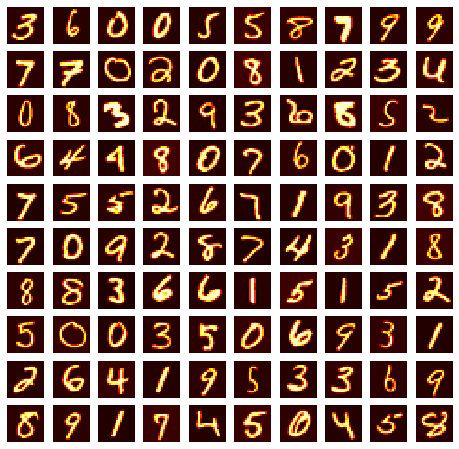

In [55]:
fig, axis = plt.subplots(10,10, figsize=(8,8))

#for i in tqdm(range(10)) :
for i in range(10):
    for j in range(10) :
        # 20 pixel
        axis[i,j].imshow(X[np.random.randint(0,5000),:].reshape(20,20,order="F"), cmap="hot")
        axis[i,j].axis("off")

### 3. computing the cost function

### sigmoid function : compute sigmoid
![title](sigmoid.png)
- parameter : z
- return : sigmoid(z)

In [56]:
def sigmoid(z) :
    return 1 / (1 + np.exp(-z))

### lrCostFunction function : compute logistic regression
![title](logistic_regression.png)
![title](logistic_regression_gradient.png)
- parameter : theta, X, y, Lambda
- parameter : theta_t, X_t, y_t, 3
    - theta_t : 4x1
    - X_t : 5x4
    - y_t : 5x1
- return : regualized costfunction, regualized gradient descent 

In [57]:
def LRCostFunction(theta, X, y, Lambda) : 
    
    # cost function
    m = len(y) # 5
    predictions = sigmoid(X @ theta) #(5x4)x(4x1) = (5x1)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))
    cost = 1/m * sum(error)
    regCost = cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    # gradient
    # j=0
    # (4x5)x(5x1) = (4x1) 중에 0번째
    j0 = 1/m * (X.transpose() @ (predictions-y))[0] 
    # j>0
    # (4x5)x(5x1) = (4x1) 중에 1번째부터 
    j = 1/m * (X.transpose() @ (predictions-y))[1:] + (Lambda/m) * theta[1:]
    grad = np.vstack((j0[:,np.newaxis],j))
    
    return regCost, grad

In [58]:
theta_t = np.array([-2,-1,1,2]).reshape(4,1) #4x1
X_t = np.array([np.linspace(0.1,1.5,15)]).reshape(3,5).T #5x3
X_t = np.hstack((np.ones((5,1)), X_t))  #5x4, 1열에 1추가, bias
y_t = np.array([1,0,1,0,1]).reshape(5,1) #5x1

J, grad = LRCostFunction(theta_t, X_t, y_t, 3)

print("1. Cost:",J,"\nExpected cost: 2.534819\n")
print("2. Gradients:\n",grad,"\nExpected gradients:\n 0.146561\n -0.548558\n 0.724722\n 1.398003")

1. Cost: [2.5348194] 
Expected cost: 2.534819

2. Gradients:
 [[ 0.14656137]
 [-0.54855841]
 [ 0.72472227]
 [ 1.39800296]] 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003


### 4. One vs all Classification
![title](OneVsAll.png)

### Gradient Descent
- optimize theta
- minimize cost function

- parameter : X,y,theta,alpha,num_iters,Lambda
- parameter : X,np.where(y==i,1,0),initial_theta,1,300,Lambda
    - X : 5000x401
    - np.where(y==i,1,0) : 5000x1
    - initial_theta : 401x1
    - Lambda = 0.1
- return : optimize theta, change of cost function during iteration

In [59]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda) :
    m = len(y) # m=5000
    J_history = []
    
    for i in range(num_iters) : #0~300
        cost, grad = LRCostFunction(theta, X, y, Lambda)
        theta = theta - (alpha*grad)
        J_history.append(cost)
        
    return theta, J_history

- parameter : X, y, num_labels, Lambda
- parameter : X, y, 10, 0.1
    - X : 5000x400
    - y : 5000x1
- return : optimize theta, change of cost function during labels

In [60]:
def oneVsAll(X, y, num_labels, Lambda) :
    # m = 5000, n = 400
    m, n = X.shape[0], X.shape[1] 
    initial_theta = np.zeros((n+1, 1)) # 401 x 1
    all_theta = []
    all_J = []
    
    X = np.hstack((np.ones((m,1)),X)) # 5000 x (401), bias
    
    for i in tqdm(range(1, num_labels+1)) :
        # y==i : 1=true, 0=false
        theta, J_history = gradientDescent(X,np.where(y==i,1,0),initial_theta,1,300,Lambda)
        all_theta.extend(theta)
        all_J.extend(J_history)
        
    return np.array(all_theta).reshape(num_labels,n+1), all_J

In [61]:
all_theta, all_J = oneVsAll(X, y, 10, 0.1)

### 5. Plotting of cost function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

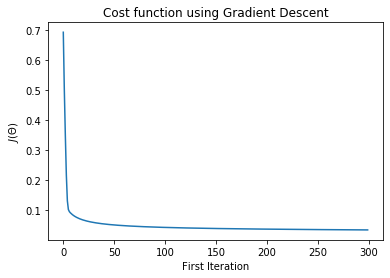

In [62]:
plt.plot(all_J[0:300]) # 첫번째 iteration
plt.xlabel("First Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### 6. One-vs-all Prediction

- parameter : all_theta, X
    - all_theta : 10x401
    - X : 5000x400
- return : optimize theta, change of cost function during labels

In [63]:
def prediction(all_theta, X) :
    m = X.shape[0] #m=5000
    X = np.hstack((np.ones((m,1)),X)) #5000x401
    
    predictions = X @ all_theta.T #(5000x401)x(401X10)
    
    # 확률이 가장 큰 인자를 고름
    return np.argmax(predictions,axis=1)+1

In [64]:
pred = prediction(all_theta, X)
result = np.zeros((11,1))
#count=0
for i in range(5000) :
    for j in range(1,11) :
        if pred[i] == j :
            result[j] = result[j] + 1
        #count = count + 1
result[1:]
#count = 5000

array([[524.],
       [473.],
       [490.],
       [506.],
       [473.],
       [514.],
       [501.],
       [506.],
       [496.],
       [517.]])

In [65]:
# pred == y : true, false
# (맞은 개수 / 총 개수 ) * 100 : 백분율
print("Training set Accuracy : ", sum(pred[:,np.newaxis]==y)[0]/5000*100, "%")

Training set Accuracy :  91.46 %


# Nerual Networks

### 1. Load data

In [66]:
mat2 = loadmat("ex3weights.mat")
Theta1 = mat2["Theta1"] # 25x401
Theta2 = mat2["Theta2"] # 10x26

### 2. Forward propagation

- parameter : Theta, Theta2, X
    - X : 5000x400
- return  : np.argmax(a2,axis=1)+1
    - 최대값에 해당하는 인덱스

In [67]:
def predict(Theta1, Theta2, X) :
    m = X.shape[0] #5000
    X = np.hstack((np.ones((m,1)),X)) #5000x401
    
    a1 = sigmoid(X @ Theta1.T) # 5000x25
    a1 = np.hstack((np.ones((m,1)), a1)) #5000x26
    a2 = sigmoid(a1 @ Theta2.T) # 5000x10
    
    # class choice
    return np.argmax(a2,axis=1)+1

In [209]:
pred2 = predict(Theta1, Theta2, X)
total = sum(pred2[:,np.newaxis]==y)[0]
mean = sum(pred2[:,np.newaxis]==y)[0]/5000
print("Training Set Accuracy:",mean*100,"%")

Training Set Accuracy: 18.8 %


### 3. cost function
- Theta1, Theta2 에 대한 정규화
![title](nnCostfunction.png)

- paramter : nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda
- parameter : nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1
    - nn_params(Theta1 + Theta2) : 401x25 + 10x26 = 10285
    - input_layer_size : 400
    - hidden_layer_size : 25
    - num_labels(multi-class) : 10
    - X : 5000x400
    - y : 5000x1
    - Lambda : 1
- return : cost, grad1, grad2, reg_J, grad1_reg, grad2_reg

In [69]:
def nnCostfunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda):
    
    # nn_params를 합치는 이유는? NN이 어떤 크기에도 적용할 수 있도록
    # 25x401
    Theta1 = nn_params[:((input_layer_size+1)*hidden_layer_size)].reshape(hidden_layer_size, input_layer_size+1)
    # 10x26
    Theta2 = nn_params[((input_layer_size+1)*hidden_layer_size):].reshape(num_labels, hidden_layer_size+1)
    
    m = X.shape[0] #5000
    J = 0
    X = np.hstack((np.ones((m,1)),X)) #5000x401
    y10 = np.zeros((m,num_labels)) #5000x10
    
    # predict
    a1 = sigmoid(X @ Theta1.T) #5000x25
    a1 = np.hstack((np.ones((m,1)), a1)) #5000x26
    a2 = sigmoid(a1 @ Theta2.T) #5000x10
    
    # class 확인 0,1
    for i in range(1, num_labels+1) :
        y10[:,i-1][:,np.newaxis] = np.where(y==i,1,0) #one-hot encoding
    # cost function 계산
    for j in range(num_labels) :
        J = J + sum(-y10[:,j]*np.log(a2[:,j]) - (1-y10[:,j])*np.log(1-a2[:,j]))
        
    cost = 1/m * J
    #두 Theta에 대한 정규화, 0번째는 bias로 전파 안됨
    reg_J = cost + Lambda/(2*m) * (np.sum(Theta1[:,1:]**2)+np.sum(Theta2[:,1:]**2))
    
    # back-propagation
    grad1 = np.zeros((Theta1.shape)) #25x401
    grad2 = np.zeros((Theta2.shape)) #10x26
    
    for i in range(m) : # 5000
        xi = X[i,:] # 400
        a1i = a1[i,:] #26
        a2i = a2[i,:] # 10
        d2 = a2i - y10[i,:] #error, 10
        
        d1 = Theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi@Theta1.T)))
        grad1 = grad1 + d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T
        grad2 = grad2 + d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
    grad1 = 1/m * grad1 # Theta1에 대한 gradient descent 
    grad2 = 1/m * grad2 # Theta2 에 대한 gradient descent
    
    grad1_reg = grad1 + (Lambda/m) * np.hstack((np.zeros((Theta1.shape[0],1)),Theta1[:,1:]))
    grad2_reg = grad2 + (Lambda/m) * np.hstack((np.zeros((Theta2.shape[0],1)),Theta2[:,1:]))
    
    return cost, grad1, grad2, reg_J, grad1_reg, grad2_reg

In [70]:
def sigmoidGradient(z) :
    sigmoid = 1/(1+np.exp(-z))
    
    return sigmoid * (1-sigmoid)

In [71]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10
nn_params = np.append(Theta1.flatten(), Theta2.flatten())

J, reg_J = nnCostfunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 1)[0:4:3]

print("Cost at parameters (non-regularized):",J,"\nCost at parameters (Regularized):",reg_J)

Cost at parameters (non-regularized): 0.2876291651613188 
Cost at parameters (Regularized): 0.38376985909092354


### 4. Random initialization


In [175]:
def randInitializeWeights(L_in, L_out) : 
    
    #epi = (6**1/2) / (L_in + L_out)**1/2
    #W = np.random.rand(L_out, L_in+1) * (2*epi) - epi
    
    W = np.random.rand(L_out, L_in+1) /np.sqrt(L_in/2)
    
    return W

In [73]:
initial_Theta1 = randInitializeWeights(input_layer_size, hidden_layer_size) #25x401
initial_Theta2 = randInitializeWeights(hidden_layer_size, num_labels) #10x26

initial_nn_params = np.append(initial_Theta1.flatten(), initial_Theta2.flatten())

### 5. Learning parameters using Gradient Descent

- parameter : X, y, initial_params, alpha, num_iters, Lambda, input_layer_size, hidden_layer_size, num_labels
- parameter : X,y,initial_nn_params,0.8,800,1,input_layer_size, hidden_layer_size, num_labels
    - X : 5000x400
    - y : 5000x1
    - alpha : 0.8
    - num_iters : 800
    - lambda : 1
- return : nn_paramsFinal, J_history(during iters)

- 정규화X

In [220]:
def gradientDescentnn1(X, y, initial_params, alpha, num_iters, Lambda, input_layer_size, hidden_layer_size, num_labels) :
    
    division = (input_layer_size+1)*hidden_layer_size # Theta1, 2 경계
    Theta1 = initial_params[:division].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = initial_params[division:].reshape(num_labels, hidden_layer_size+1)
    
    m = len(y) #5000
    J_history = []
    
    for i in tqdm(range(num_iters)) : #800번
        nn_params = np.append(Theta1.flatten(), Theta2.flatten())
        cost, grad1, grad2 = nnCostfunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)[:3]
                
        # gradient descent 구해서 Theta 학습
        Theta1 = Theta1 - (alpha*grad1)
        Theta2 = Theta2 - (alpha*grad2)
        
        J_history.append(cost)

        if i % 50 == 49:
            
            pred_train1 = predict(Theta1, Theta2, X)

            total = sum(pred_train1[:,np.newaxis]==y)[0]
            average = total/X.shape[0]
            print("Training Set Accuracy no regularization:",average*100,"%")
    
    nn_paramsFinal = np.append(Theta1.flatten(), Theta2.flatten())
    return nn_paramsFinal, J_history

- 정규화

In [221]:
def gradientDescentnn2(X, y, initial_params, alpha, num_iters, Lambda, input_layer_size, hidden_layer_size, num_labels) :
    
    division = (input_layer_size+1)*hidden_layer_size # Theta1, 2 경계
    Theta1 = initial_params[:division].reshape(hidden_layer_size,input_layer_size+1)
    Theta2 = initial_params[division:].reshape(num_labels, hidden_layer_size+1)
    
    m = len(y) #5000
    J_history = []
    
    for i in tqdm(range(num_iters)) : #800번
        nn_params = np.append(Theta1.flatten(), Theta2.flatten())
        cost, grad1, grad2 = nnCostfunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, Lambda)[3:]
        
        # gradient descent 구해서 Theta 학습
        Theta1 = Theta1 - (alpha*grad1)
        Theta2 = Theta2 - (alpha*grad2)
        
        J_history.append(cost)
        
        if i % 50 == 49:
            
            pred_train1 = predict(Theta1, Theta2, X)

            total = sum(pred_train1[:,np.newaxis]==y)[0]
            average = total/X.shape[0]
            print("Training Set Accuracy no regularization:",average*100,"%")
    
    nn_paramsFinal = np.append(Theta1.flatten(), Theta2.flatten())
    return nn_paramsFinal, J_history

In [223]:
nnTheta, nnJ_history = gradientDescentnn1(x_train,y_train,initial_nn_params,0.8,800,1,input_layer_size, hidden_layer_size, num_labels)

Theta1 = nnTheta[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2 = nnTheta[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

Training Set Accuracy no regularization: 10.2 %
Training Set Accuracy no regularization: 10.299999999999999 %


KeyboardInterrupt: 

In [ ]:
plt.plot(nnJ_history[0:800])

plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

In [79]:
nnJ_history[:2] # 0,1 의 차이가 큼

[6.9245162041172, 3.258403332114302]

In [80]:
nnJ_history[-1]

0.5332755709163117

In [81]:
#위와 비교

debug_J = nnCostfunction(nn_params, input_layer_size, hidden_layer_size, num_labels, X, y, 3)
# degug_J[3] = reg_J (예시는 grad 출력)
print("Cost at (fixed) debugging parameters (w/ lambda = 3):",debug_J[3])

Cost at (fixed) debugging parameters (w/ lambda = 3): 0.576051246950133


In [97]:
pred3 = predict(Theta1, Theta2, X)

total = sum(pred3[:,np.newaxis]==y)[0]
average = total/X.shape[0]
print("Training Set Accuracy:",average*100,"%")

Training Set Accuracy: 94.24 %


## training set vs. test set

In [259]:
mat = loadmat("ex3data1.mat") # matlab file, X, y

X = mat["X"] # 5000x400
y = mat["y"] # 5000x1

In [262]:
tmp = [[x,y] for x,y in zip(X,y)]

In [263]:
import random
random.shuffle(tmp)

In [267]:
X = [n[0] for n in tmp]
y = [n[1] for n in tmp]

In [268]:
X = np.array(X)
y = np.array(y)

In [271]:
x_train = X[:4000] #4000x400
y_train = y[:4000] #4000x1

x_test = X[4000:] #1000x400
y_test = y[4000:] #1000x1

### 1. training set 

In [272]:
input_layer_size = 400
hidden_layer_size = 25
num_labels = 10

In [273]:
initial_Theta1_train = randInitializeWeights(input_layer_size, hidden_layer_size) #25x401
initial_Theta2_train = randInitializeWeights(hidden_layer_size, num_labels) #10x26

initial_nn_params_train = np.append(initial_Theta1_train.flatten(), initial_Theta2_train.flatten())

- 정규화 포함 안 한 값으로 계산, 계산 시간상 iteration 500으로 줄임 

In [274]:
nnTheta_train1, nnJ_history_train1 = gradientDescentnn1(X,y,initial_nn_params_train,0.8,500,1,input_layer_size, hidden_layer_size, num_labels)

Theta1_train1 = nnTheta_train1[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2_train1= nnTheta_train1[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

Training Set Accuracy no regularization: 52.18000000000001 %
Training Set Accuracy no regularization: 66.46 %
Training Set Accuracy no regularization: 79.96 %
Training Set Accuracy no regularization: 86.0 %
Training Set Accuracy no regularization: 88.72 %
Training Set Accuracy no regularization: 89.96 %
Training Set Accuracy no regularization: 90.8 %
Training Set Accuracy no regularization: 91.36 %
Training Set Accuracy no regularization: 91.97999999999999 %
Training Set Accuracy no regularization: 92.30000000000001 %



- 정규화 한 값으로 계산한 결과

In [275]:
nnTheta_train2, nnJ_history_train2 = gradientDescentnn2(x_train,y_train,initial_nn_params_train,0.8,500,1,input_layer_size, hidden_layer_size, num_labels)

Theta1_train2 = nnTheta_train2[:((input_layer_size+1) * hidden_layer_size)].reshape(hidden_layer_size,input_layer_size+1)
Theta2_train2 = nnTheta_train2[((input_layer_size +1)* hidden_layer_size ):].reshape(num_labels,hidden_layer_size+1)

Text(0.5, 1.0, 'Cost function using Gradient Descent_train1')

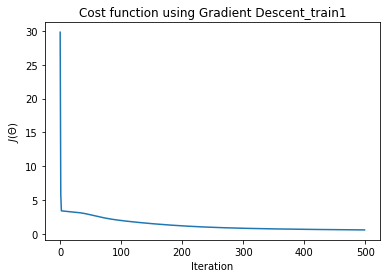

In [276]:
plt.plot(nnJ_history_train1[0:500])

plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent_train1")

Text(0.5, 1.0, 'Cost function using Gradient Descent_train2')

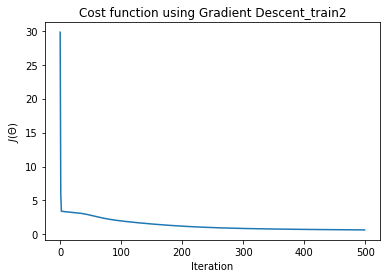

In [277]:
plt.plot(nnJ_history_train2[0:500])

plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent_train2")

In [278]:
pred_train1 = predict(Theta1_train1, Theta2_train1, x_train)

total = sum(pred_train1[:,np.newaxis]==y_train)[0]
average = total/x_train.shape[0]
print("Training Set Accuracy no regularization:",average*100,"%")

Training Set Accuracy no regularization: 92.15 %


In [279]:
pred_train2 = predict(Theta1_train2, Theta2_train2, x_train)

total = sum(pred_train2[:,np.newaxis]==y_train)[0]
average = total/x_train.shape[0]
print("Training Set Accuracy with regularization:",average*100,"%")

Training Set Accuracy with regularization: 92.75 %


- test set

In [280]:
pred_test1 = predict(Theta1_train1, Theta2_train1, x_test)

total = sum(pred_test1[:,np.newaxis]==y_test)[0]
average = total/x_test.shape[0]
print("Training Set Accuracy no regularization:",average*100,"%")

Training Set Accuracy no regularization: 92.9 %


In [281]:
pred_test2 = predict(Theta1_train2, Theta2_train2, x_test)

total = sum(pred_test2[:,np.newaxis]==y_test)[0]
average = total/x_test.shape[0]
print("Training Set Accuracy with regularization:",average*100,"%")

Training Set Accuracy with regularization: 91.10000000000001 %
